# Environment setup

In [22]:
import sys
from bro.plot_utils import finalize, fig_setup, set_title_axes_labels, plot_error_bars, plot_centered_error_bars
from bro.repertoire_and_countdata import DistributionComputations, GenerateCountData, ProcessJointPdfs, generate_count_data_and_compute_joint_pdf
from bro.utilityfunctions import uniform_distribution_pdf, unpickle_object
plt.rcParams['text.usetex'] = True
import numpy as np
import pandas as pd

import palettable
import warnings
warnings.filterwarnings("ignore") # to suppress RunTime warnings


# Set color scheme

In [23]:
palette = palettable.colorbrewer.sequential.YlGnBu_8.mpl_colors
prior_color = palette[3]
colors = {m: palette[4+ii] for ii,m in enumerate([50,96,144,192])}

# Figure 2

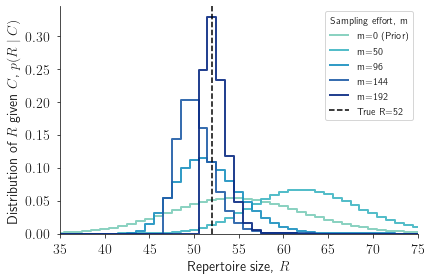

In [24]:
R_prior = np.load('./R_poisson_prior.npy')
Ra, Rb, s = 52, 60, 20
m_vals = [50,96,144,192]

results = unpickle_object('./data/fig2.pkl')
pdf = R_prior

fig, axs = fig_setup(1,1)
# sampling effort plots
_=axs[0].step(pdf[:,0],pdf[:,1],where='mid',lw=2,alpha=0.9,label='m=0 (Prior)',color=prior_color)
x = [
    axs[0].step(
    results[key][:,0], results[key][:,1],
    where='mid', lw=2, alpha=0.9,
    label=f'm={key}', color=colors[key]) 
    for ii, key in enumerate(results.keys())
]

_=axs[0].axvline(x=Ra, color='k', linestyle='--', label=f'True R={Ra}') # plot true R
_=axs[0].set_xlabel(r'Repertoire size, $R$')
_=axs[0].set_ylabel(r'Distribution of $R$ given $C$, $p(R \mid C)$')
_=axs[0].set_xlim(30,80)
_=axs[0].set_ylim(bottom=0)
_=axs[0].set_xlim([35,75])
finalize(axs[0])
axs[0].legend(title='Sampling effort, m')

plt.tight_layout()

# Figure 3

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


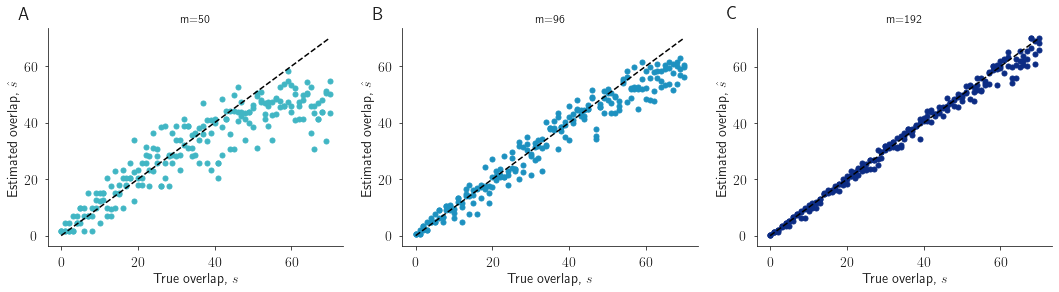

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


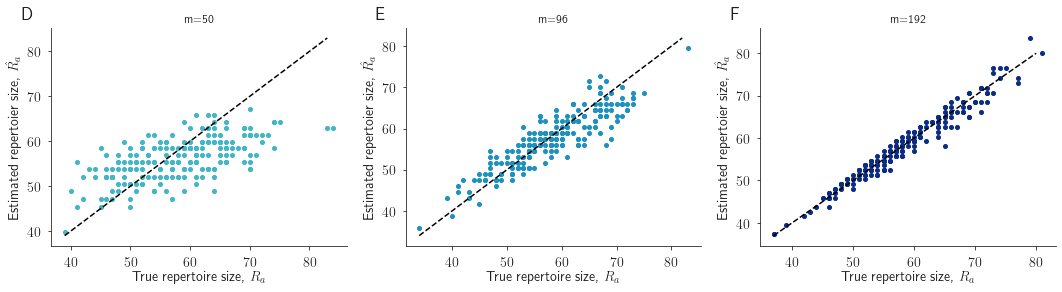

In [25]:
df = pd.DataFrame(unpickle_object('./data/fig3.pkl'))
df.sort_values(by=['ma'],inplace=True)
df.reset_index(drop=True,inplace=True)
# df.head(2)

m_vals = [50, 96, 192]

# overlap, s, plots
fig, axs = fig_setup(1,len(m_vals))    
for i, m in enumerate(m_vals):
    subset = df[df['ma']==m]
    subset.sort_values(by=['s'],inplace=True)
    t=axs[i].plot(subset['s'],subset['s_mean'],'o',markersize=5,color=colors[m])
    t=axs[i].plot(subset['s'],subset['s'],'k--')
    t=set_title_axes_labels(axs[i],f'm={m}',r'True overlap, $s$',r'Estimated overlap, $\hat{s}$')
finalize(axs)
# plt.tight_layout()
labs = ['A','B','C']
for idx, ax in enumerate(axs):
    _=ax.text(-0.1, 1.1, labs[idx], transform=ax.transAxes, fontname='Arial',
                    fontsize=18, fontweight='bold', va='top', ha='left')
plt.show()

# repertoire size, Ra, plots
fig, axs = fig_setup(1,len(m_vals))
for i, m in enumerate(m_vals):
    subset = df[df['ma']==m]
    Ra_min = subset['Ra'].min()
    Ra_max = subset['Ra'].max()
    x = subset['s']
    t=axs[i].plot(subset['Ra'],subset[f'Ra_mean'],'o',markersize=4,zorder=1,color=colors[m])
#     t=axs[i].plot(subset['s'],subset['Ra']-subset[f'{var}_mean'],'o',label='Estimates')
    t=axs[i].plot(np.arange(Ra_min,Ra_max),np.arange(Ra_min,Ra_max),'k--',zorder=2)
#     t=set_title_axes_labels(axs[i],f'm={m}',r'$R_a$',r'$R_a-\hat{R_a}$')
    t=set_title_axes_labels(axs[i],f'm={m}',r'True repertoire size, $R_a$',r'Estimated repertoier size, $\hat{R_a}$')
finalize(axs)
labs = ['D','E','F']
for idx, ax in enumerate(axs):
    _=ax.text(-0.1, 1.1, labs[idx], transform=ax.transAxes, fontname='Arial',
                    fontsize=18, fontweight='bold', va='top', ha='left')
plt.show()

# Figure 4

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


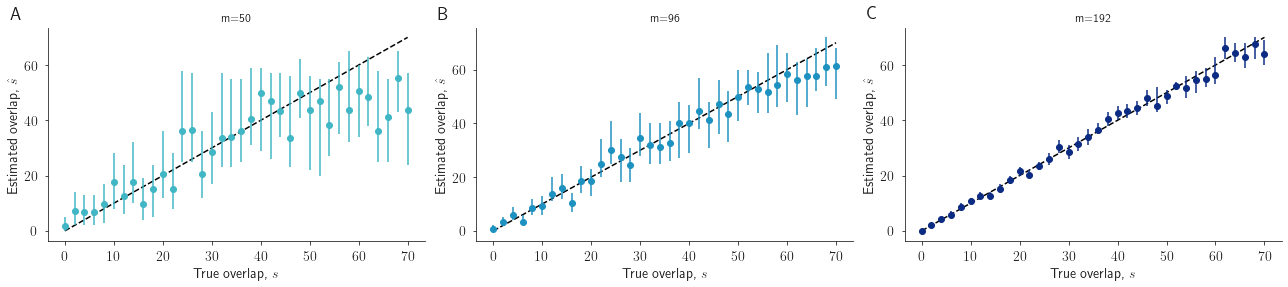

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


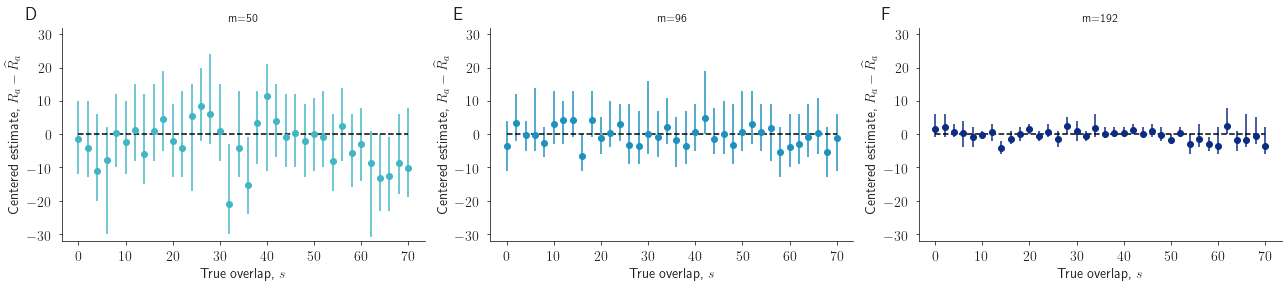

In [26]:
df = pd.DataFrame(unpickle_object('./data/fig4.pkl'))
df.sort_values(by=['ma'],inplace=True)
df.reset_index(drop=True,inplace=True)
m_vals = [50, 96, 192]


var = 's'
fig, axs = fig_setup(1,len(m_vals))
for i, m in enumerate(m_vals):
    subset = df[df['ma']==m]
    subset.sort_values(by=['s'],inplace=True)
    t=plot_error_bars(axs[i],subset['s'],subset['s_mean'],subset['s_low'],subset['s_high'],zorder=2,color=colors[m])
#             t=axs[i].plot(subset['s'],subset['s'],'k--',label='True')
    t=axs[i].plot(subset['s'],subset['s'],'k--',zorder=1)
    t=set_title_axes_labels(axs[i],f'm={m}',r'True overlap, $s$',r'Estimated overlap, $\hat{s}$')
finalize(axs)
plt.tight_layout()
labs = ['A','B','C']
for idx, ax in enumerate(axs):
    _=ax.text(-0.1, 1.1, labs[idx], transform=ax.transAxes, fontname='Arial',
                    fontsize=18, fontweight='bold', va='top', ha='left')
plt.show()


var = 'Ra'
max_miss = np.max([np.max(np.abs(df[var]-df[f'{var}_high'])),np.max(np.abs(df[var]-df[f'{var}_low']))])
fig, axs = fig_setup(1,len(m_vals))
for i, m in enumerate(m_vals):
    max_miss = np.max([np.max(np.abs(df[var]-df[f'{var}_high'])),np.max(np.abs(df[var]-df[f'{var}_low']))])
    subset = df[df['ma']==m]
    subset.sort_values(by=['s'],inplace=True)
#     t=plot_error_bars(axs[i],subset['Ra'],subset['Ra_mean'],subset['Ra_low'],subset['Ra_high'],'Estimate',zorder=2)
    t=plot_centered_error_bars(axs[i],subset['s'],subset[f'{var}_mean'],
                               subset[var],subset[f'{var}_low'],subset[f'{var}_high'],color=colors[m])
#     t=axs[i].set_ylim(30,80)
#     t=axs[i].plot(subset['Ra'],subset['Ra'],'k--',zorder=1)
    x = subset['s']
    t=axs[i].plot(x,np.repeat(0,len(x)),'k--')
    t=set_title_axes_labels(axs[i],f'm={m}',r'True overlap, $s$',r'Centered estimate, $R_a-\widehat{R}_a$')
    t=axs[i].set_ylim(-32,32)
finalize(axs)
for ax in axs:
    t=ax.legend(frameon=False,loc='upper left')
plt.tight_layout()
labs = ['D','E','F']
for idx, ax in enumerate(axs):
    _=ax.text(-0.1, 1.1, labs[idx], transform=ax.transAxes, fontname='Arial',
                    fontsize=18, fontweight='bold', va='top', ha='left')
plt.show()



# Figure 5

In [27]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

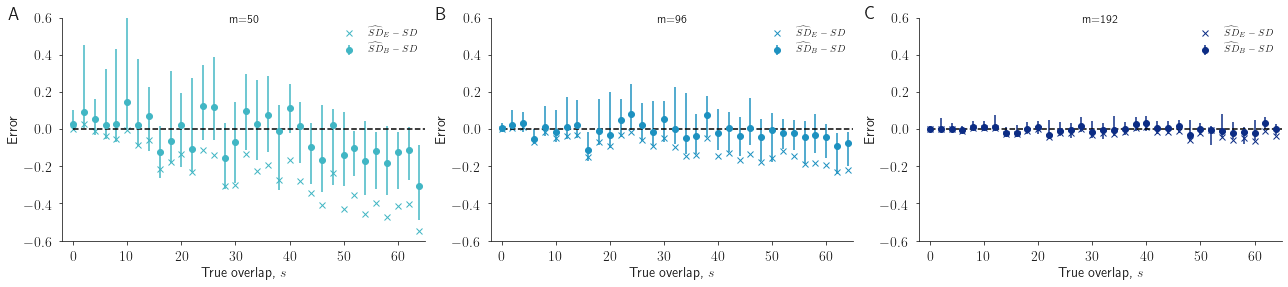

In [28]:
df = pd.DataFrame(unpickle_object('./data/fig5.pkl'))
df.sort_values(by=['ma'],inplace=True)
df.reset_index(drop=True,inplace=True)
m_vals = [50,96,192]

fig, axs = fig_setup(1,len(m_vals))
for i, m in enumerate(m_vals):
    subset = df[df['ma']==m]
    subset.sort_values(by=['s'],inplace=True)
    x = subset['s']

    t=plot_centered_error_bars(axs[i],x,subset['bayes_mean'],subset['true_sd'],
                               subset['bayes_low'],subset['bayes_high'],
                               label=r'$\widehat{SD}_B-SD$',
                               color=colors[m]
                              )
    t=axs[i].plot(x,subset['empirical_sd']-subset['true_sd'],'x',
                  label=r'$\widehat{SD}_E-SD$',fillstyle='none',
                  color=adjust_lightness(colors[m],1), zorder=2
                 )
    t=axs[i].plot(x,np.repeat(0,len(x)),'k--')
    t=set_title_axes_labels(axs[i],f'm={m}',r'True overlap, $s$','Error')
    t=axs[i].set_title(f'm={m}',y=0.95)  
    t=axs[i].set_xlim(-2,65)
    t=axs[i].set_ylim(-0.6,0.6)

finalize(axs)
labs = ['A','B','C']
plt.tight_layout()
for idx, ax in enumerate(axs):
    _=ax.text(-0.15, 1.05, labs[idx], transform=ax.transAxes, fontname='Arial',
                    fontsize=18, fontweight='bold', va='top', ha='left')
plt.show()


# Figure 6

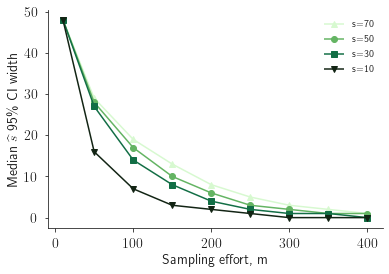

In [29]:
df = pd.DataFrame(unpickle_object('./data/fig6.pkl'))

variables = ['s','Ra','Rb']
symbols = ['^','o','s','v']
colors2 = ['teal','darkturquoise','deepskyblue','royalblue']

results = []
for m in df['ma'].unique():
    for s in df['s'].unique():
        subset = df[(df['ma']==m) & (df['s']==s)]
        assert subset.shape[0]==300
        for var in variables:
            median = np.median(subset[f'{var}_high']-subset[f'{var}_low'])
            results.append([m,s,var,median])

results = pd.DataFrame(results, columns='m,s,var,median'.split(','))
df = results[results['var']=='s']

fig, axs = fig_setup(1,1)
axs[0].set_prop_cycle('color', palettable.cmocean.sequential.Algae_4.mpl_colors)
s_vals = list(df['s'].unique())
s_vals.sort(reverse=True)
s_vals = [70, 50, 30, 10]
for ii, s in enumerate(s_vals):
    subset = df[df['s']==s]
    subset.sort_values(by=['m'],inplace=True)
    t=axs[0].plot(subset['m'], subset['median'],'o-',label=f's={s}',markersize=6,marker=symbols[ii])
t=set_title_axes_labels(axs[0], title=None, xlabel='Sampling effort, m', ylabel=r'Median $\widehat{s}$ 95\% CI width')
finalize(axs)
plt.show()

